#02 간단한 모델 생성

##2-1 데이터 로드 및 전처리

In [1]:
#tensorflow 모듈 import
import tensorflow as tf

In [2]:
#mnist 손글씨 이미지 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_valid,y_valid) = mnist.load_data()

print(x_train.shape,y_train.shape)
print(x_valid.shape,y_valid.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


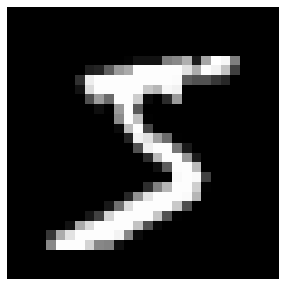

In [3]:
#샘플 이미지 출력
import matplotlib.pylab as plt

def plot_image(data,idx):
    plt.figure(figsize=(5,5))
    plt.imshow(data[idx],cmap='gray')
    plt.axis('off')
    plt.show()

plot_image(x_train,0)

In [6]:
#정규화(Normalization)
x_train = x_train/255.0
x_valid = x_valid/255.0

print(x_train.min(),x_train.max())
print(x_valid.min(),x_valid.max())

0.0 1.5378700499807765e-05
0.0 1.5378700499807765e-05


mnist 데이터셋은 색상을 나타내는 채널이 1개인 모노컬러 이미지로 구성된다.  
CNN 모델에 주입하기 위해서는 색상을 나타내는 채널을 추가해준다. 다음 코드는 tf.newaxis 축을 텐서 배열에 직접 추가하는 방식이다. 따라서 (60000,28,28) 형태의 텐서가 (60000,28,28,1) 형태로 변환된다.

In [7]:
#채널 추가
print(x_train.shape,x_valid.shape)

x_train_in = x_train[...,tf.newaxis]
x_valid_in = x_valid[...,tf.newaxis]

print(x_train_in.shape,x_valid_in.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


[tip] 가장 앞에 차원을 추가하고 싶다면 [tf.newaxis,...], 두번째 차원을 추가하고 싶다면 [:,tf.newaxis,:,:]로 작성한다.

##2-2 Sequential API 로 모델 생성 및 학습

In [9]:
#sequential API 를 사용해 샘플 모델 생성
model = tf.keras.Sequential([
                             #Convolution 적용(32 filters)
                             tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1),name='conv'),
                             #Max Pooling 적용
                             tf.keras.layers.MaxPooling2D((2,2),name='pool'),
                             #Classifier 출력층
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(10,activation='softmax'),
])

In [34]:
#모델 컴파일
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#모델 훈련
history = model.fit(x_train_in,y_train,validation_data=(x_valid_in,y_valid),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 26s 14ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 2/10
1875/1875 [==============================] - 25s 14ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 3/10
1875/1875 [==============================] - 25s 14ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 4/10
1875/1875 [==============================] - 26s 14ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 5/10
1875/1875 [==============================] - 26s 14ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 6/10
1875/1875 [==============================] - 26s 14ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 7/10
1875/1875 [==============================] - 25s 14ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3009 -

In [33]:
model.evaluate(x_valid_in,y_valid)

313/313 [==============================] - 2s 5ms/step - loss: 2.3010 - accuracy: 0.1135


[2.300973415374756, 0.11349999904632568]

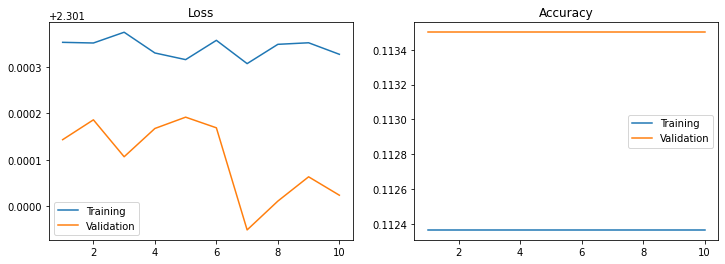

In [35]:
def plot_loss_acc(history,epoch):
    loss,val_loss = history.history['loss'],history.history['val_loss']
    acc,val_acc = history.history['accuracy'],history.history['val_accuracy']

    fig,axes = plt.subplots(1,2,figsize=(12,4))

    axes[0].plot(range(1,epoch+1),loss,label='Training')
    axes[0].plot(range(1,epoch+1),val_loss,label='Validation')
    axes[0].legend(loc='best')
    axes[0].set_title('Loss')

    axes[1].plot(range(1,epoch+1),acc,label='Training')
    axes[1].plot(range(1,epoch+1),val_acc,label='Validation')
    axes[1].legend(loc='best')
    axes[1].set_title('Accuracy')

    plt.show()

plot_loss_acc(history,10)

##2-3 모델 구조 파악

(28,28,1) 형태의 입력 텐서가 Conv2D를 거치면서 (26,26,32) 형태로 변환된다. 서로 다른 32개의 필터를 적용했기 때문에 (26,26) 크기의 특성맵이 32개 생성된다. 즉, (28,28,1) 이미지에 서로 다른 32개의 커널을 적용해서 32가지 종류의 피처(특징)을 추출하는 것이다.

(2,2) 크기의 풀링 레이어를 적용했기 때문에 이미지 크기가 1/2로 줄어든다. 따라서 풀링 레이어를 거치면 (13,13,32) 텐서로 변환되고, Flatten 층에서 3차원 텐서를 1차원 텐서로 펼치면 5408개(13 x 13 x 32) 원소를 갖는 1차원 벡터가 된다.  
이 벡터를 출력 노드 10개인 Dense 레이어로 보내면 최종 분류 값을 예측해 출력한다. 즉, 이미지를 입력받아 특징을 추출하고 이미지가 나타내는 숫자를 예측할 수 있다.

In [16]:
#모델 구조
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv (Conv2D)               (None, 26, 26, 32)        320       
                                                                 
 pool (MaxPooling2D)         (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


생성된 모델 인스턴스의 input 속성으로부터 입력 레이어의 텐서를 추출할 수 있다. 입력 텐서는 (None,28,28,1) 형태인데, 가장 앞에 있는 축(axis=0)의 None 값은 배치 크기가 들어오는 위치로서 배치 크기를 어떤 값이든 가능하다는 의미이다.

In [17]:
#입력 텐서 형태
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [18]:
#출력 텐서 형태
model.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense')>

모델의 출력 텐서는 output 속성으로 선택할 수 있다. 10개의 노드를 갖는 1차원 벡터 형태이다.

In [19]:
#레이어 
model.layers

In [20]:
#첫번째 레이어 선택
model.layers[0]

In [21]:
#첫 번째 레이어 입력
model.layers[0].input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [22]:
#첫 번째 레이어 출력
model.layers[0].output

<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv')>

Conv2D 레이어에는 모델의 입력 데이터가 그대로 들어가기 때문에 (None,28,28,1) 형태를 갖는다. Conv2D 레이어를 거치면 픽셀 사이즈가 2씩 줄어들고 채널 개수가 32개로 늘어나면서,(None,26,26,32) 형태를 갖는다.

In [23]:
#첫 번째 레이어 가중치
model.layers[0].weights

[<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[-0.09374838,  0.11970955, -0.02449531,  0.01523703,
           -0.00781535, -0.01904463, -0.09268101,  0.04588333,
           -0.07045297, -0.03511409, -0.12034207,  0.0844837 ,
           -0.13685045,  0.03151369,  0.06124559,  0.02254668,
           -0.08074298, -0.13069998,  0.08055968, -0.04724374,
           -0.07176667, -0.05234212,  0.1253093 , -0.09031823,
            0.06373142, -0.01177017, -0.03695668,  0.13548228,
            0.09206868,  0.09793391,  0.03021904,  0.12471341]],
 
         [[-0.0519126 ,  0.08129231,  0.00594228, -0.08715558,
           -0.01707224,  0.0302864 ,  0.06066743,  0.00167226,
            0.12345405,  0.09293958, -0.10469817, -0.01070347,
           -0.09938528,  0.10373249, -0.04591055, -0.01475323,
           -0.13193773, -0.03375681, -0.0987362 , -0.05400047,
            0.12965873, -0.13048007,  0.10485975, -0.06172814,
            0.06554547,  0.11987238,  0.04

'conv/kernel:0' : 커널(합성곱 필터) 행렬의 가중치  
'conv/bias:0' : 각 커널의 상수항(bias)

In [24]:
#첫 번쨰 레이어 커널 가중치
model.layers[0].kernel

<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[-0.09374838,  0.11970955, -0.02449531,  0.01523703,
          -0.00781535, -0.01904463, -0.09268101,  0.04588333,
          -0.07045297, -0.03511409, -0.12034207,  0.0844837 ,
          -0.13685045,  0.03151369,  0.06124559,  0.02254668,
          -0.08074298, -0.13069998,  0.08055968, -0.04724374,
          -0.07176667, -0.05234212,  0.1253093 , -0.09031823,
           0.06373142, -0.01177017, -0.03695668,  0.13548228,
           0.09206868,  0.09793391,  0.03021904,  0.12471341]],

        [[-0.0519126 ,  0.08129231,  0.00594228, -0.08715558,
          -0.01707224,  0.0302864 ,  0.06066743,  0.00167226,
           0.12345405,  0.09293958, -0.10469817, -0.01070347,
          -0.09938528,  0.10373249, -0.04591055, -0.01475323,
          -0.13193773, -0.03375681, -0.0987362 , -0.05400047,
           0.12965873, -0.13048007,  0.10485975, -0.06172814,
           0.06554547,  0.11987238,  0.04040783,  0.128615

커널 가중치의 shape이 (3,3,1,32)라는 것을 알 수 있다.  
여기서 (3,3)은 필터의 크기, (1)은 입력층의 채널 개수,(32)는 출력층의 채널 개수를 나타낸다.  
따라서, layer[0] 커널의 학습(업데이트) 가능한 파라미터의 수는 3 x 3 x 1 x 32 = 288 개가 된다. 상수항(bias) 가중치의 shape은 (32,)이고, 이는 출력층의 채널 수를 말한다. 따라서, layers[0] 의 총 학습 가능한 파라미터 수는 커널과 상수항을 더해서 288 + 32 = 320개가 된다.

In [25]:
#첫 번째 레이어 bias 가중치
model.layers[0].bias

<tf.Variable 'conv/bias:0' shape=(32,) dtype=float32, numpy=
array([ 0.        , -0.00588371, -0.00599835, -0.00600365, -0.00600479,
       -0.00600478, -0.00600354, -0.00600422, -0.00595678, -0.00103421,
       -0.00289579, -0.00379323, -0.00600523, -0.00600367, -0.00599769,
       -0.00536354, -0.0060041 , -0.00600445, -0.00073232, -0.00632936,
       -0.00734746, -0.00586874, -0.00600505, -0.00644647, -0.00600355,
       -0.00743614, -0.00671882, -0.00600437, -0.00600267, -0.00600504,
       -0.00554374, -0.00530983], dtype=float32)>

In [26]:
#레이어 이름 사용하여 레이어 선택
model.get_layer('conv')

In [27]:
#샘플 이미지의 레이어별 출력을 리스트에 추가(첫 번째, 두 번째 레이어)
activator = tf.keras.Model(inputs=model.input,outputs=[layer.output for layer in model.layers[:2]])
activations = activator.predict(x_train_in[0][tf.newaxis,...])

len(activations)

2

In [28]:
#첫번쨰 레이어(conv) 출력층
conv_activation = activations[0]
conv_activation.shape

(1, 26, 26, 32)

2개의 출력 텐서 중에서 첫 번째 텐서는 Conv2D 레이어의 출력이다. 텐서의 형태는 (1,26,26,32) 인데, 여기서 1은 입력 이미지의 개수를 나타낸다. 샘플이 1개라는 뜻이다.

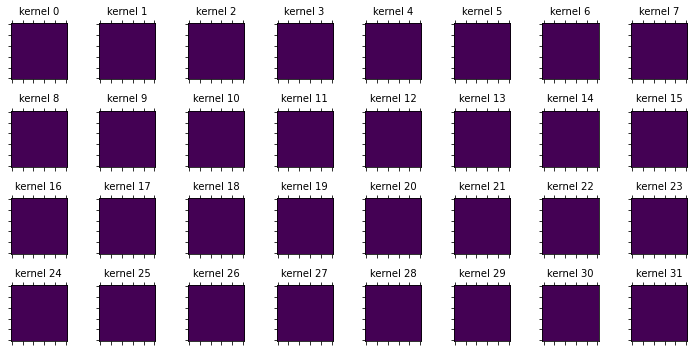

In [32]:
#Convoluation 시각화
fig,axes = plt.subplots(4,8)
fig.set_size_inches(10,5)

for i in range(32):
    axes[i//8,i%8].matshow(conv_activation[0,:,:,i],cmap='viridis')
    axes[i//8,i%8].set_title('kernel %s'%str(i),fontsize=10)
    plt.setp(axes[i//8,i%8].get_xticklabels(),visible=False)
    plt.setp(axes[i//8,i%8].get_yticklabels(),visible=False)
    
plt.tight_layout()
plt.show()

In [38]:
#두 번쨰 레이어(pool) 출력층
pooling_activation = activations[1]
print(pooling_activation.shape)

(1, 13, 13, 32)


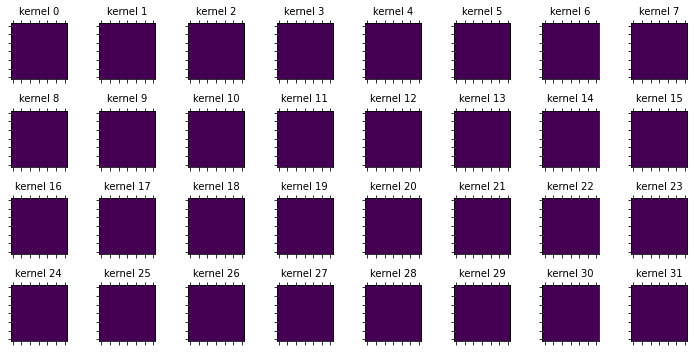

In [40]:
#시각화
fig,axes = plt.subplots(4,8)
fig.set_size_inches(10,5)

for i in range(32):
    axes[i//8,i%8].matshow(pooling_activation[0,:,:,i],cmap='viridis')
    axes[i//8,i%8].set_title('kernel %s'%str(i),fontsize=10)
    plt.setp(axes[i//8,i%8].get_xticklabels(),visible=False)
    plt.setp(axes[i//8,i%8].get_yticklabels(),visible=False)

plt.tight_layout()
plt.show()